******************** Train Data read ********************
     LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  LOC_COMMENTS  \
0           25             9           1                     7             9   
1            7             9           1                     2             0   
2           20            33           7                     8            49   
3            0             3           0                     0             0   
4            3             3           2                     0             1   
..         ...           ...         ...                   ...           ...   
732         16            19           6                     5            12   
733         36            27           1                    11            24   
734          9             3           3                     0             3   
735          4            21           2                     0             0   
736          1            13           4                     0

[Voting] ...................... (1 of 3) Processing RF:, total=   7.7s
[Voting] ..................... (2 of 3) Processing SVM:, total=   1.2s
[Voting] ..................... (3 of 3) Processing NBG:, total=   0.0s


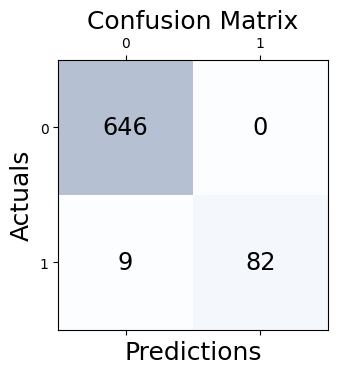

precision is: 1.0
Recall is: 0.9
Area under curve(AUC): 0.98
F-Measure is: 0.95

              precision    recall  f1-score   support

           N       0.99      1.00      0.99       646
           Y       1.00      0.90      0.95        91

    accuracy                           0.99       737
   macro avg       0.99      0.95      0.97       737
weighted avg       0.99      0.99      0.99       737



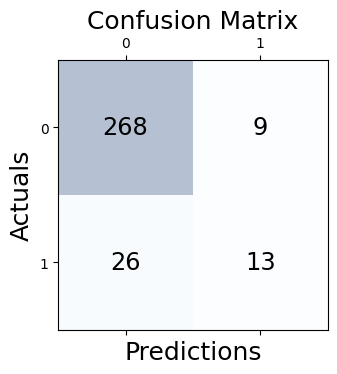

precision is: 0.59
Recall is: 0.33
Area under curve(AUC): 0.81
F-Measure is: 0.43

              precision    recall  f1-score   support

           N       0.91      0.97      0.94       277
           Y       0.59      0.33      0.43        39

    accuracy                           0.89       316
   macro avg       0.75      0.65      0.68       316
weighted avg       0.87      0.89      0.88       316

Traininng Accuracy is 98.78
Testing accuracy is 88.92


In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler


#-----------Fetching train and test data from root directory---------------#

dataset_url = "./PC3_Train.csv" #this source will change for respective dataset
train_data = pd.read_csv(dataset_url)
print("*" * 20 + ' Train Data read ' + "*" * 20)
print(train_data)


dataset_url = "./PC3_Test.csv" #this source will change for respective dataset
test_data = pd.read_csv(dataset_url)
print("*" * 20 + ' Test Data read ' + "*" * 20)
print(test_data);

#X_train, X_test has training & testing data
X_train=train_data.drop(columns='Defective')
print(X_train)
X_test = test_data.drop(columns='Defective')
print(X_test);

#Y_train, Y_test has train/test class lables 
Y_train = train_data["Defective"]
Y_test = test_data["Defective"]
print(Y_train)
print(Y_test)



#---------------applying voting ensemble---------------------#


voting_classifiers=[
    ['RF:',RandomForestClassifier(criterion="gini",max_depth=10,n_estimators=500,max_features=None,random_state=0)],
    ['SVM:',svm.SVC(kernel='poly', C=2,probability=True,random_state=0)],
    ['NBG:',GaussianNB()]]
    
clf=VotingClassifier(estimators=voting_classifiers, voting='soft',verbose=1,)
print(clf.get_params())

#----------------training model--------------------------#

clf=clf.fit(X_train,Y_train)


#----------------get training predictios-----------------#

training_predictions= clf.predict(X_train)
#print(training_predictions);

#-----------------generate training confusion matrix--------#

confusion_matrix(Y_train,training_predictions,labels = ['N','Y'])


#----------------draw training confusion matrix--------------#

conf_matrix = confusion_matrix(Y_train,training_predictions)
fig, ax = plt.subplots(figsize=(3.5, 3.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#-----------------get evaluation matrix of training data------------------#

#precision
precision = precision_score(Y_train,training_predictions,pos_label='Y')
print ("precision is: " + str(round(precision,2)))


#recall
recall = recall_score(Y_train,training_predictions,pos_label='Y')
print ("Recall is: " + str(round(recall,2)))


# predict probabilities
pred_prob = clf.predict_proba(X_train)[::,1]
#print(pred_prob)

# auc scores
auc = metrics.roc_auc_score(Y_train, pred_prob)
print("Area under curve(AUC): " + str(round(auc,2)))

f_measure=f1_score(Y_train, training_predictions,pos_label='Y')
print ("F-Measure is: " + str(round(f_measure,2))+'\n')

print(classification_report(Y_train,training_predictions))



#------------------get test predictions--------------------#

predictions = clf.predict(X_test)
#print(predictions);

#--------------generate test confusion matrix---------------#

confusion_matrix(Y_test,predictions,labels = ['N','Y'])

#--------------draw test  confusion matrix------------------#

conf_matrix = confusion_matrix(Y_test, predictions)
fig, ax = plt.subplots(figsize=(3.5, 3.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


#-----------------get evaluation matrix of testing data------------------#

#precision
precision = precision_score(Y_test,predictions,pos_label='Y')
print ("precision is: " + str(round(precision,2)))


#recall
recall = recall_score(Y_test,predictions,pos_label='Y')
print ("Recall is: " + str(round(recall,2)))


# predict probabilities
pred_prob = clf.predict_proba(X_test)[::,1]
#print(pred_prob)

# auc scores
auc = metrics.roc_auc_score(Y_test, pred_prob)
print("Area under curve(AUC): " + str(round(auc,2)))

f_measure=f1_score(Y_test, predictions,pos_label='Y')
print ("F-Measure is: " + str(round(f_measure,2))+'\n')

print(classification_report(Y_test,predictions))

#--------------------get training accuracy-------------------#

tarining_accuracy=clf.score(X_train, Y_train)
#print(tarining_accuracy*100)
print("Traininng Accuracy is " +str(round(tarining_accuracy*100,2)));

#--------------------get testing accuracy-------------------#

testing_accuracy=accuracy_score(Y_test, predictions)
#print(testing_accuracy*100)
print("Testing accuracy is " + str(round(testing_accuracy*100,2)));



In [9]:
pred = pd.DataFrame(predictions, columns=['test_predictions'])
pred["Actual Values"] = Y_test;
pred.to_csv('test_prediction.csv')

aa = pd.read_csv("test_prediction.csv")
aa.head()

Unnamed: 0 test_predictions Actual Values
0           0                N             N
1           1                N             N
2           2                N             N
3           3                N             N
4           4                N             N